In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GPTQConfig

In [4]:
from huggingface_hub import login
login()

In [7]:
model_id = "facebook/opt-125m"
tokenizer = AutoTokenizer.from_pretrained(model_id)
gptq_config = GPTQConfig(bits=4, dataset="c4", tokenizer=tokenizer)

In [8]:
quantized_model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", quantization_config=gptq_config)

Quantizing model.decoder.layers blocks :   0%|          | 0/12 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:4713: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


In [9]:
quantized_model.push_to_hub("opt-125m-gptq")
tokenizer.push_to_hub("opt-125m-gptq")

model.safetensors:   0%|          | 0.00/125M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aurel\.cache\huggingface\hub\models--Serione--opt-125m-gptq. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


CommitInfo(commit_url='https://huggingface.co/Serione/opt-125m-gptq/commit/950d2dd835f2c063bbd9bc8040f2ad42aa568767', commit_message='Upload tokenizer', commit_description='', oid='950d2dd835f2c063bbd9bc8040f2ad42aa568767', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Serione/opt-125m-gptq', endpoint='https://huggingface.co', repo_type='model', repo_id='Serione/opt-125m-gptq'), pr_revision=None, pr_num=None)

In [10]:
gptq_config = GPTQConfig(bits=4, exllama_config={"version":2})
model = AutoModelForCausalLM.from_pretrained("Serione/opt-125m-gptq", device_map="auto", quantization_config=gptq_config)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\quantizers\auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/125M [00:00<?, ?B/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:4713: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


generation_config.json:   0%|          | 0.00/139 [00:00<?, ?B/s]

In [11]:
model.save_pretrained("lama-opt-125m-gptq")


In [13]:
model_inputs = tokenizer(["How many colors are there?"], return_tensors="pt").to("cuda")
generated_ids = quantized_model.generate(**model_inputs)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


"How many colors are there?\nI'm not sure, but I think it's a lot"

In [ ]:
quantized_model.save_pretrained("opt-125m-gptq")
tokenizer.save_pretrained("opt-125m-gptq")

('opt-125m-gptq\\tokenizer_config.json',
 'opt-125m-gptq\\special_tokens_map.json',
 'opt-125m-gptq\\vocab.json',
 'opt-125m-gptq\\merges.txt',
 'opt-125m-gptq\\added_tokens.json',
 'opt-125m-gptq\\tokenizer.json')

In [6]:
from transformers import OPTForCausalLM, AutoTokenizer
from torch import nn

# Load the model and tokenizer
model_name = "facebook/opt-125m"
model = OPTForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model.model.decoder.layers = nn.ModuleList(list(model.model.decoder.layers)[-5:])

print(type(model))

<class 'transformers.models.opt.modeling_opt.OPTForCausalLM'>
OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 768, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 768)
      (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0-4): 5 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, b

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


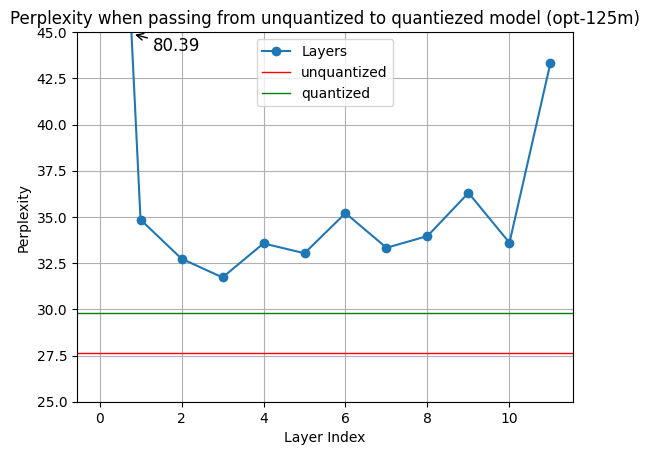

In [16]:
import matplotlib.pyplot as plt

# Given data
values = [
    80.38970947265625,
    34.85365295410156,
    32.73877716064453,
    31.72531509399414,
    33.566627502441406,
    33.034244537353516,
    35.204524993896484,
    33.33097457885742,
    33.96371841430664,
    36.301265716552734,
    33.602237701416016,
    43.33736038208008
]

# Create x values (0 to n-1 where n is the number of values)
x_values = list(range(len(values)))

# Create the line plot
plt.plot(x_values, values, label='Layers', marker='o')

# Set the y-axis limits to show values between 25 and 26
plt.ylim(25, 45)

plt.annotate('80.39', xy=(0.8, 44.9), xytext=(1.3, 44),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Add grid, title, legend, and labels
plt.axhline(27.66, color='red', linestyle='-', linewidth=1, label='unquantized')  # Reference line
plt.axhline(29.804424285888672, color='green', linestyle='-', linewidth=1, label='quantized')
plt.title('Perplexity when passing from unquantized to quantiezed model (opt-125m)')
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.legend()
plt.grid()

# Show the plot
plt.show()

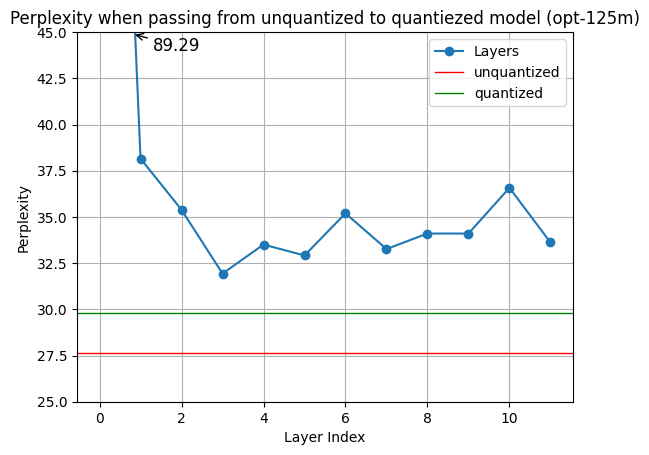

In [12]:
values = [ 
    89.29293823242188,
    38.15502166748047,
    35.38473892211914,
    31.93402099609375,
    33.503936767578125,
    32.913719177246094,
    35.19322967529297,
    33.26222610473633,
    34.1004638671875,
    34.1004638671875,
    36.57577896118164,
    33.618648529052734,
]


# Create x values (0 to n-1 where n is the number of values)
x_values = list(range(len(values)))

# Create the line plot
plt.plot(x_values, values, label='Layers', marker='o')

# Set the y-axis limits to show values between 25 and 26
plt.ylim(25, 45)

plt.annotate('89.29', xy=(0.8, 44.9), xytext=(1.3, 44),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Add grid, title, legend, and labels
plt.axhline(27.66, color='red', linestyle='-', linewidth=1, label='unquantized')  # Reference line
plt.axhline(29.804424285888672, color='green', linestyle='-', linewidth=1, label='quantized')
plt.title('Perplexity when passing from unquantized to quantiezed model (opt-125m)')
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.legend()
plt.grid()

# Show the plot
plt.show()
